Chapter 29
# 处理缺失值
Book_1《编程不难》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
from sklearn.datasets import load_iris
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# 导入鸢尾花数据
X, y = load_iris(as_frame=True, return_X_y=True)

In [7]:
# 引入缺失值
X_NaN = X.copy()
mask = np.random.uniform(0,1,size = X_NaN.shape)
mask = (mask <= 0.4)
X_NaN[mask] = np.nan

In [9]:
iris_df_NaN = X_NaN.copy()
iris_df_NaN['species'] = y

In [11]:
# 可视化缺失值位置
is_NaN = iris_df_NaN.isna()
print(iris_df_NaN.isnull().sum() * 100 / len(iris_df_NaN))

sepal length (cm)    43.333333
sepal width (cm)     37.333333
petal length (cm)    46.000000
petal width (cm)     30.666667
species               0.000000
dtype: float64


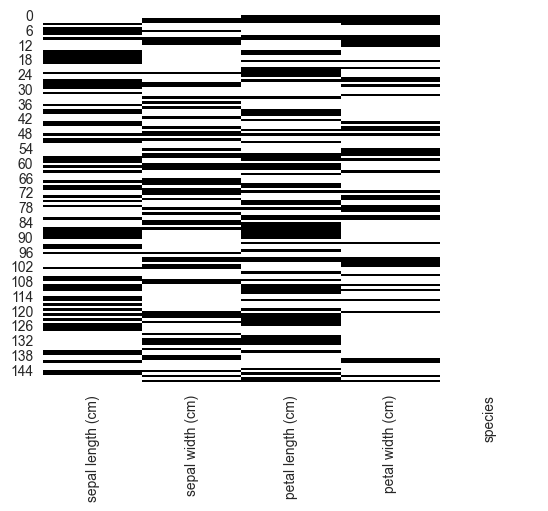

In [12]:
fig, ax = plt.subplots()
ax = sns.heatmap(is_NaN, cmap='gray_r', cbar=False)

In [21]:
# 用kNN插补
knn_i = KNNImputer(n_neighbors=5)
X_NaN_kNN = knn_i.fit_transform(X_NaN)
iris_df_kNN = pd.DataFrame(X_NaN_kNN, columns=X_NaN.columns, index=X_NaN.index)
iris_df_kNN['species'] = y

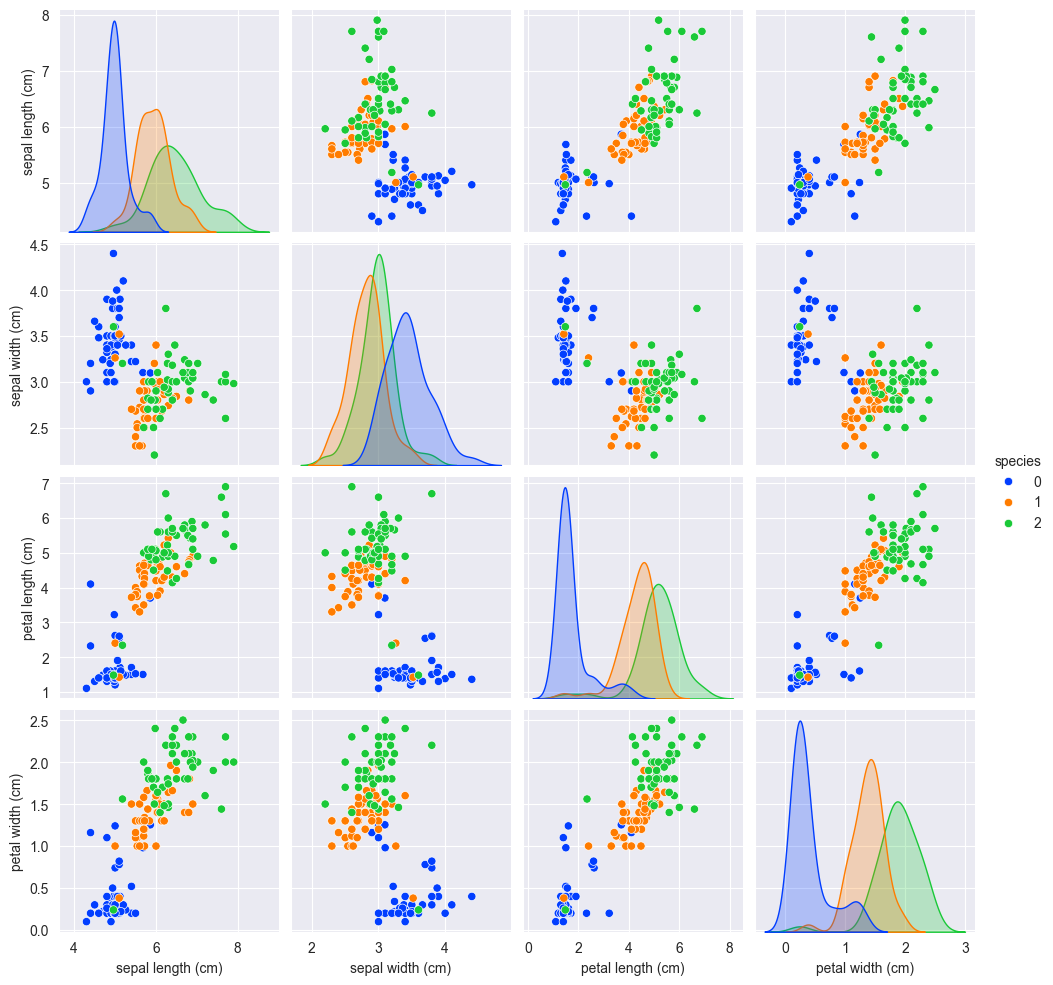

In [22]:
sns.pairplot(iris_df_kNN, hue='species', palette = "bright")